In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('C:/Users/luoyiming/Downloads/train.csv')
data_test=pd.read_csv('C:/Users/luoyiming/Downloads/test.csv')

# 数据总览

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_all=pd.concat([data_train, data_test]).reset_index(drop=True)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


各自段含义：

PassengerId => 乘客ID  
Survived => 是否幸存（1=幸存，0=未幸存）  
Pclass => 乘客等级（1/2/3，1=上层阶级，2=中层阶级，3=下层阶级）  
Name => 乘客姓名  
Sex => 性别  
Age => 年龄  
SibSp => 兄弟姐妹与配偶人数  
Parch => 父母与子女人数  
Ticket => 船票信息  
Fare => 票价  
Cabin => 客舱  
Embarked => 登船港口（S/C/Q，C=Cherbourg,S=Queenstown,Q=Southampton）   

Age，Fare，Cabin，Embarked存在缺失值的情况

# 缺失值的填充

In [6]:
data_all.corr()['Age'].abs().sort_values(ascending=False)

Age            1.000000
Pclass         0.408106
SibSp          0.243699
Fare           0.178740
Parch          0.150917
Survived       0.077221
PassengerId    0.028814
Name: Age, dtype: float64

In [7]:
data_all.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [8]:
data_all['Age'] = data_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [9]:
data_all[data_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
data_all['Embarked'] = data_all['Embarked'].fillna('S')

In [11]:
data_all.corr()['Fare'].abs().sort_values(ascending=False)

Fare           1.000000
Pclass         0.558629
Survived       0.257307
Parch          0.221539
Age            0.200039
SibSp          0.160238
PassengerId    0.031428
Name: Fare, dtype: float64

In [12]:
data_all[data_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
med_fare = data_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
data_all['Fare'] = data_all['Fare'].fillna(med_fare)

In [14]:
data_all['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
B96 B98            4
                  ..
C128               1
E10                1
B38                1
A31                1
A20                1
Name: Cabin, Length: 186, dtype: int64

In [15]:
data_all['Cabin'] = data_all["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
data_all['Cabin'].value_counts()

0    1014
1     295
Name: Cabin, dtype: int64

In [16]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [17]:
data_train,data_test = data_all.loc[:890], data_all.loc[891:].drop(columns='Survived')

# 特征工程

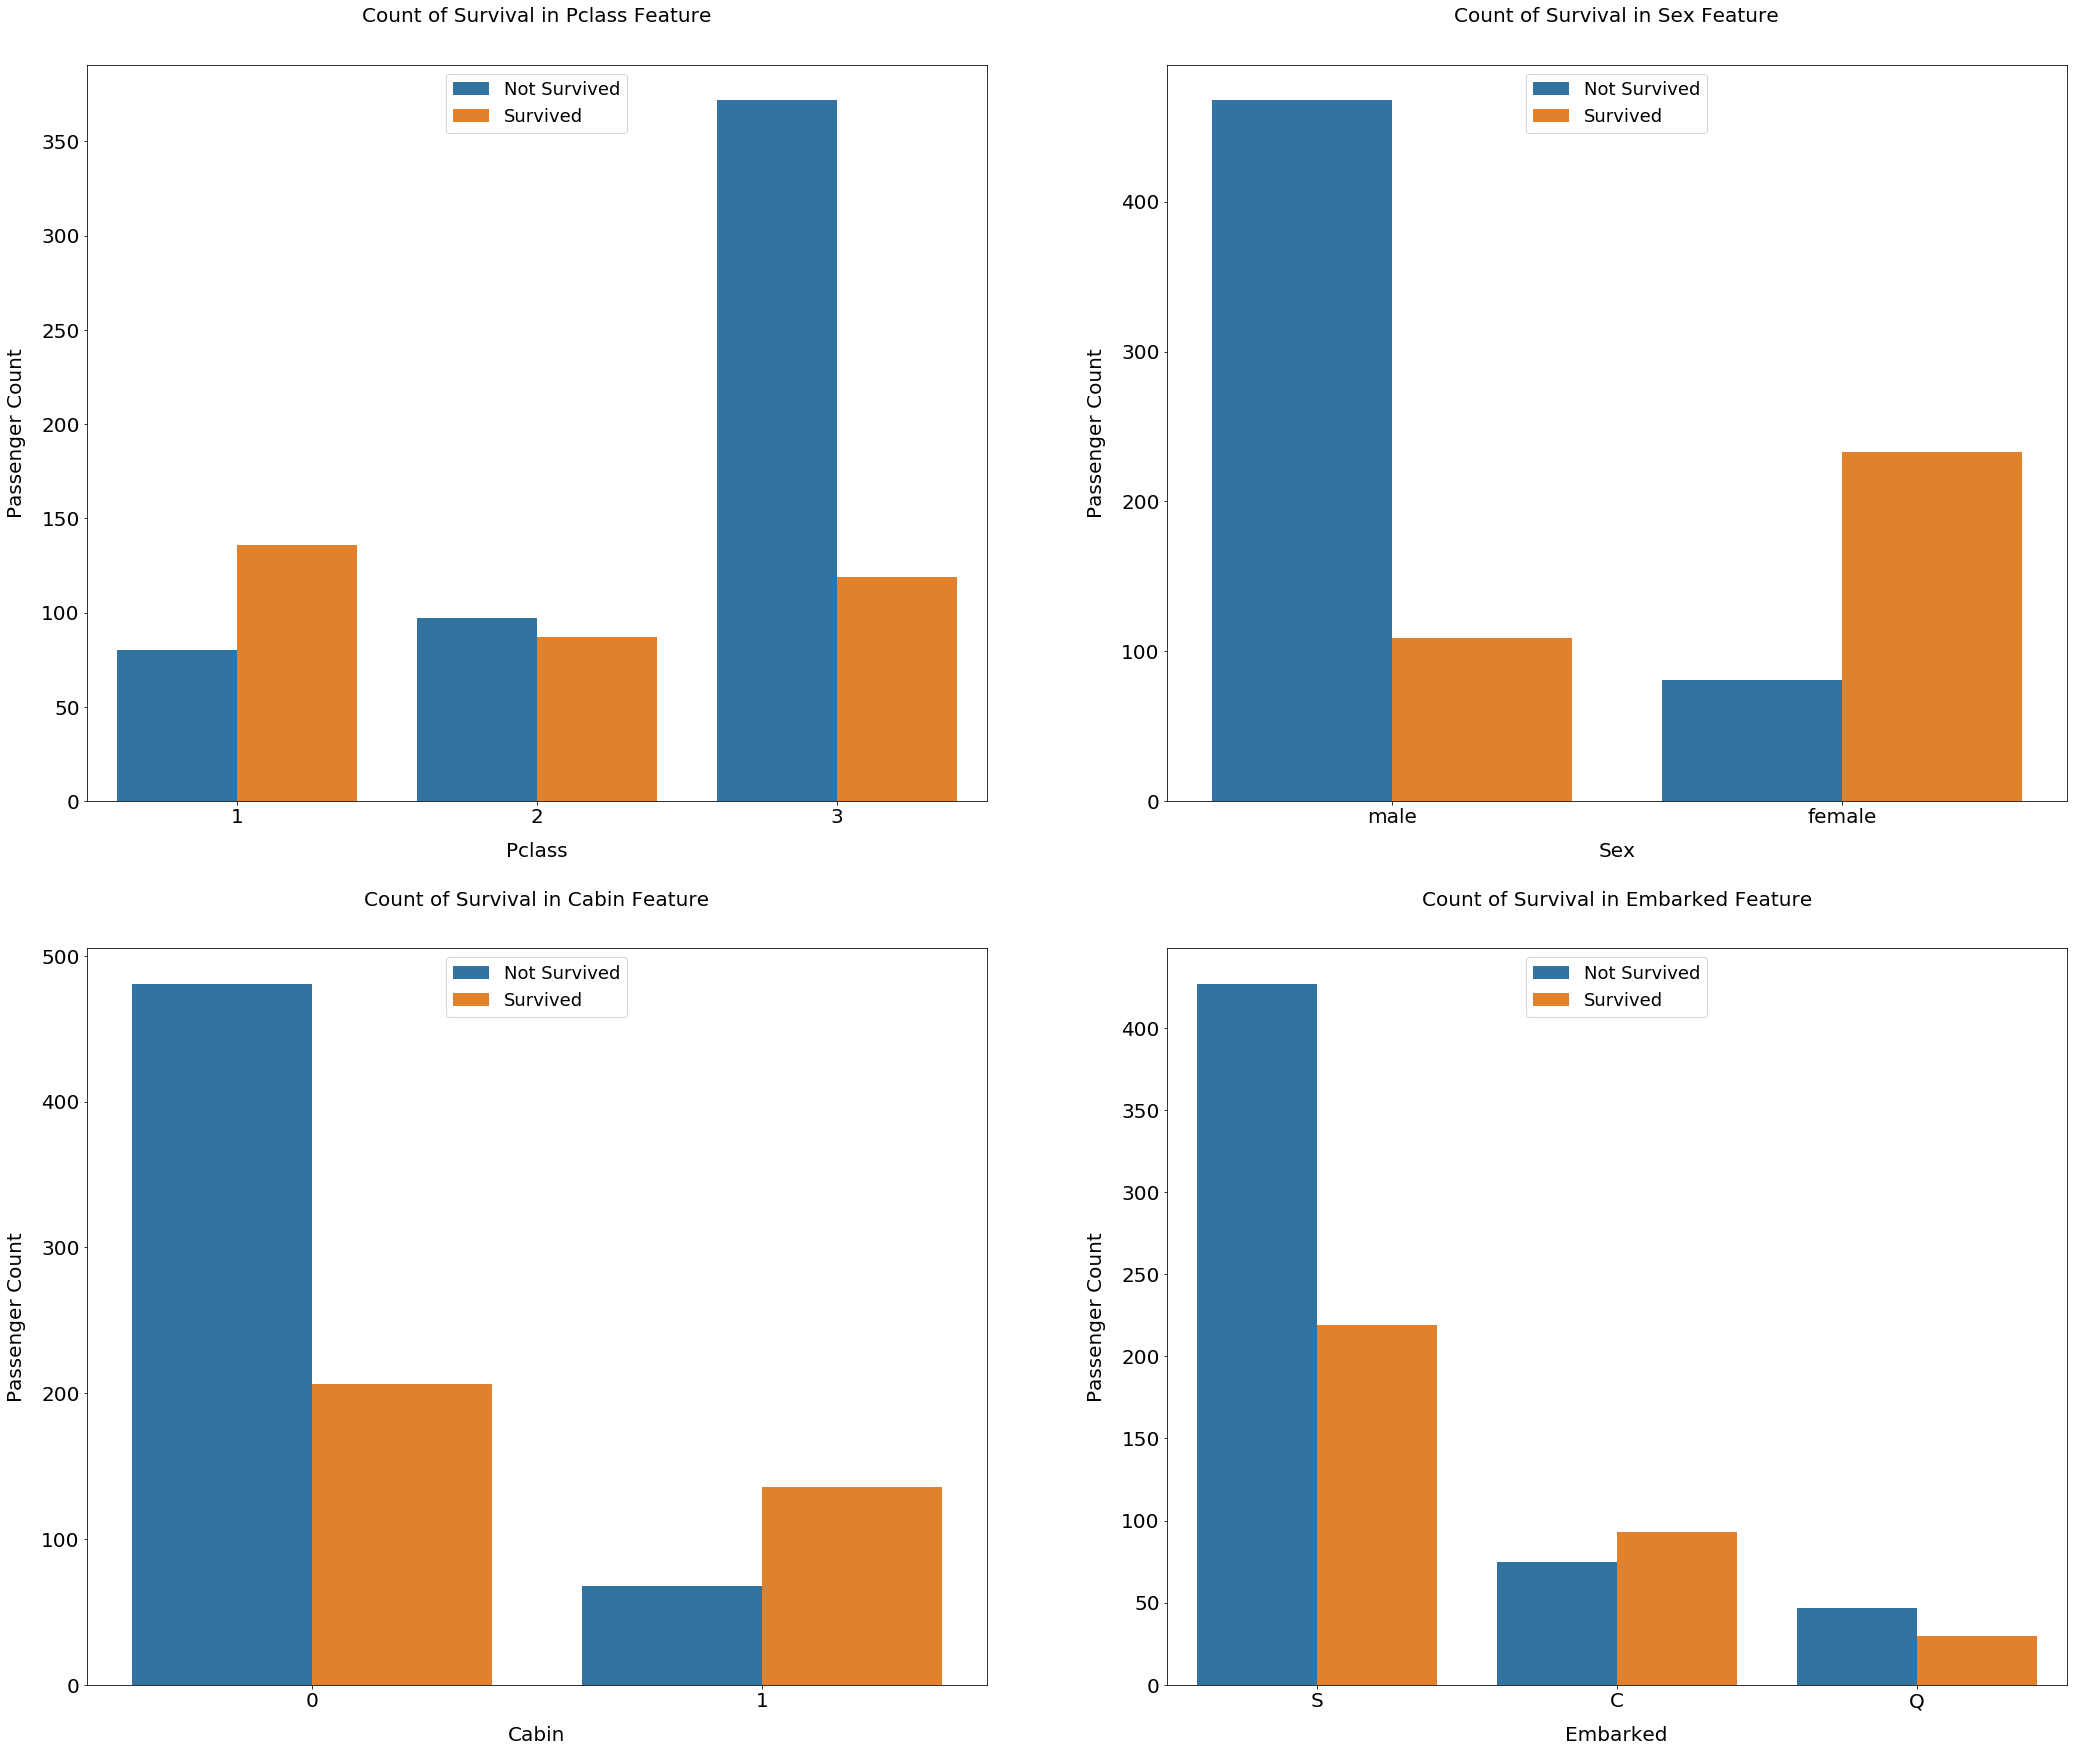

In [18]:
cat_features = ['Pclass','Sex','Cabin','Embarked']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Survived', data=data_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Text(0.5, 1.05, 'Survival Counts in Family_size Feature')

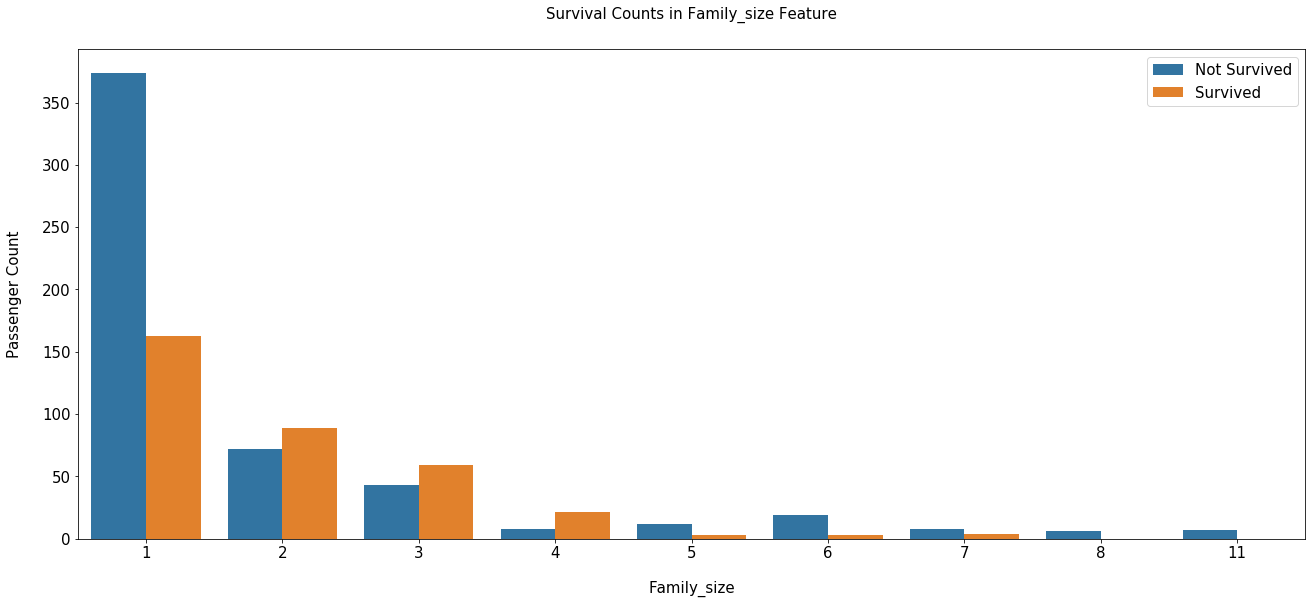

In [19]:
data_train['Family_size']=data_train['Parch']+data_train['SibSp']+1
data_test['Family_size']=data_test['Parch']+data_test['SibSp']+1

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Family_size',hue='Survived',data=data_train)
plt.xlabel('{}'.format('Family_size'), size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Family_size'), size=15, y=1.05)

Text(0.5, 1.05, 'Survival Counts in Family_size Feature')

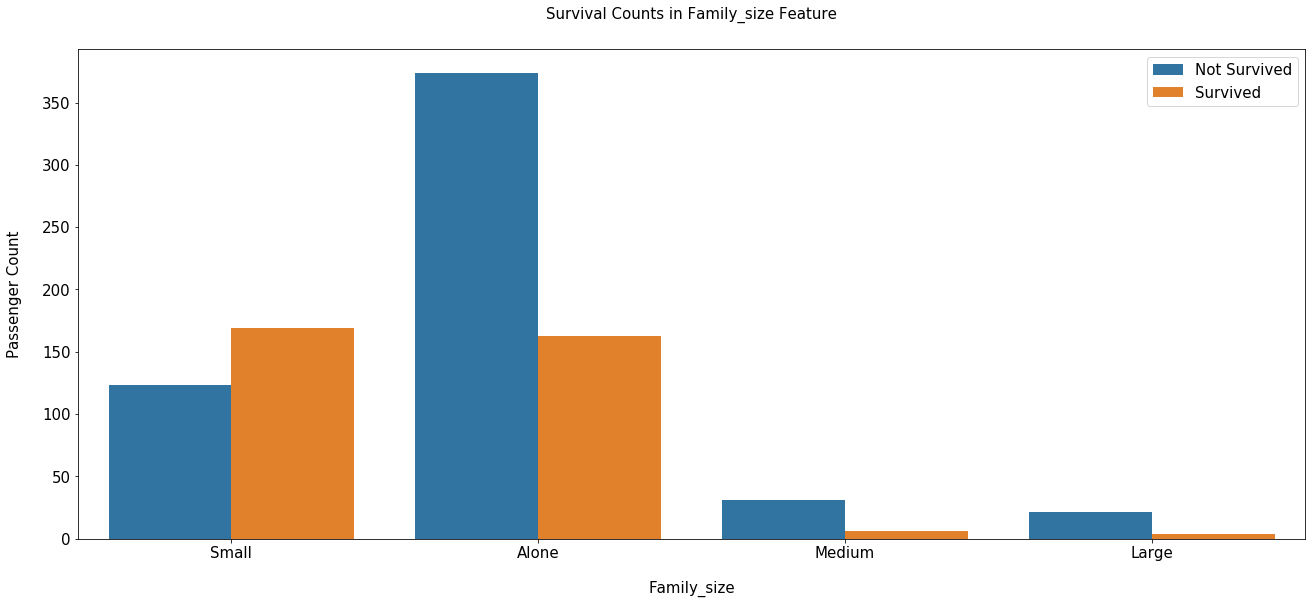

In [20]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
data_train['Family_size'] = data_train['Family_size'].map(family_map)
data_test['Family_size'] = data_test['Family_size'].map(family_map)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Family_size',hue='Survived',data=data_train)
plt.xlabel('{}'.format('Family_size'), size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Family_size'), size=15, y=1.05)

In [21]:
data_all.Ticket.value_counts()

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
347077           7
                ..
347075           1
36967            1
244346           1
SC 1748          1
112277           1
Name: Ticket, Length: 929, dtype: int64

In [22]:
data_train=data_train.drop(columns='Ticket')
data_test=data_test.drop(columns='Ticket')

In [23]:
data_train['Title']=data_train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data_test['Title']=data_test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Don               1
the Countess      1
Jonkheer          1
Sir               1
Mme               1
Ms                1
Capt              1
Name: Title, dtype: int64

In [24]:
data_train['Title'] = data_train['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data_train['Title'] = data_train['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

data_test['Title'] = data_test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data_test['Title'] = data_test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

data_train['Title'].value_counts()

Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: Title, dtype: int64

Text(0.5, 1.05, 'Survival Counts in Title Feature')

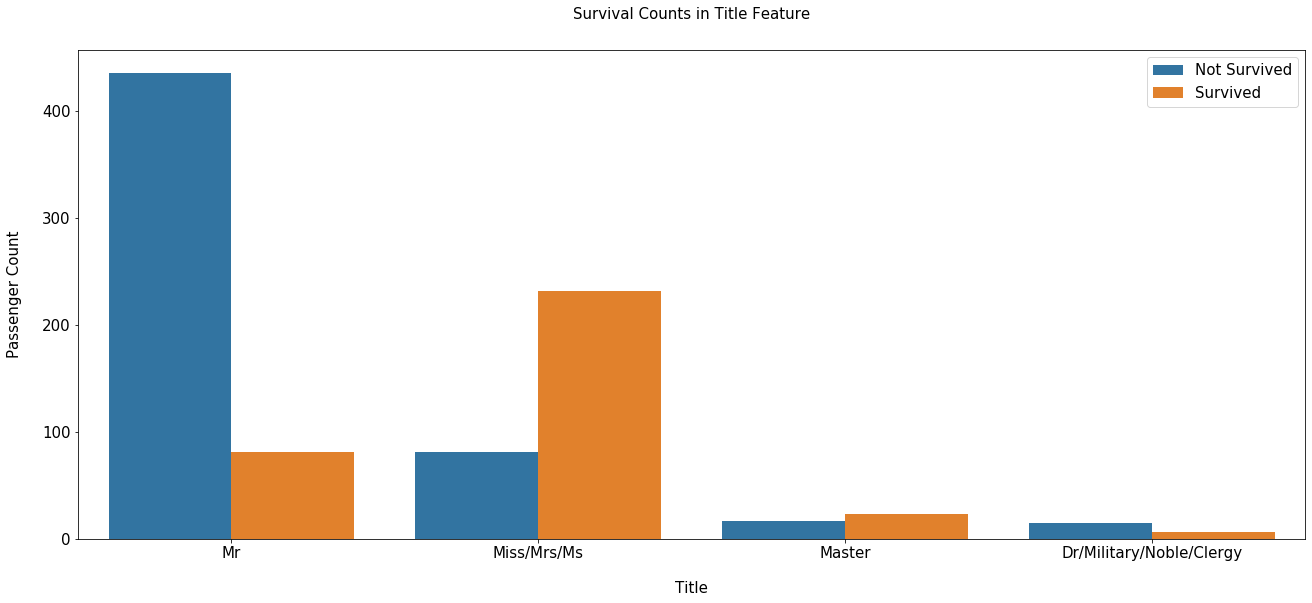

In [25]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Title',hue='Survived',data=data_train)
plt.xlabel('{}'.format('Title'), size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Title'), size=15, y=1.05)

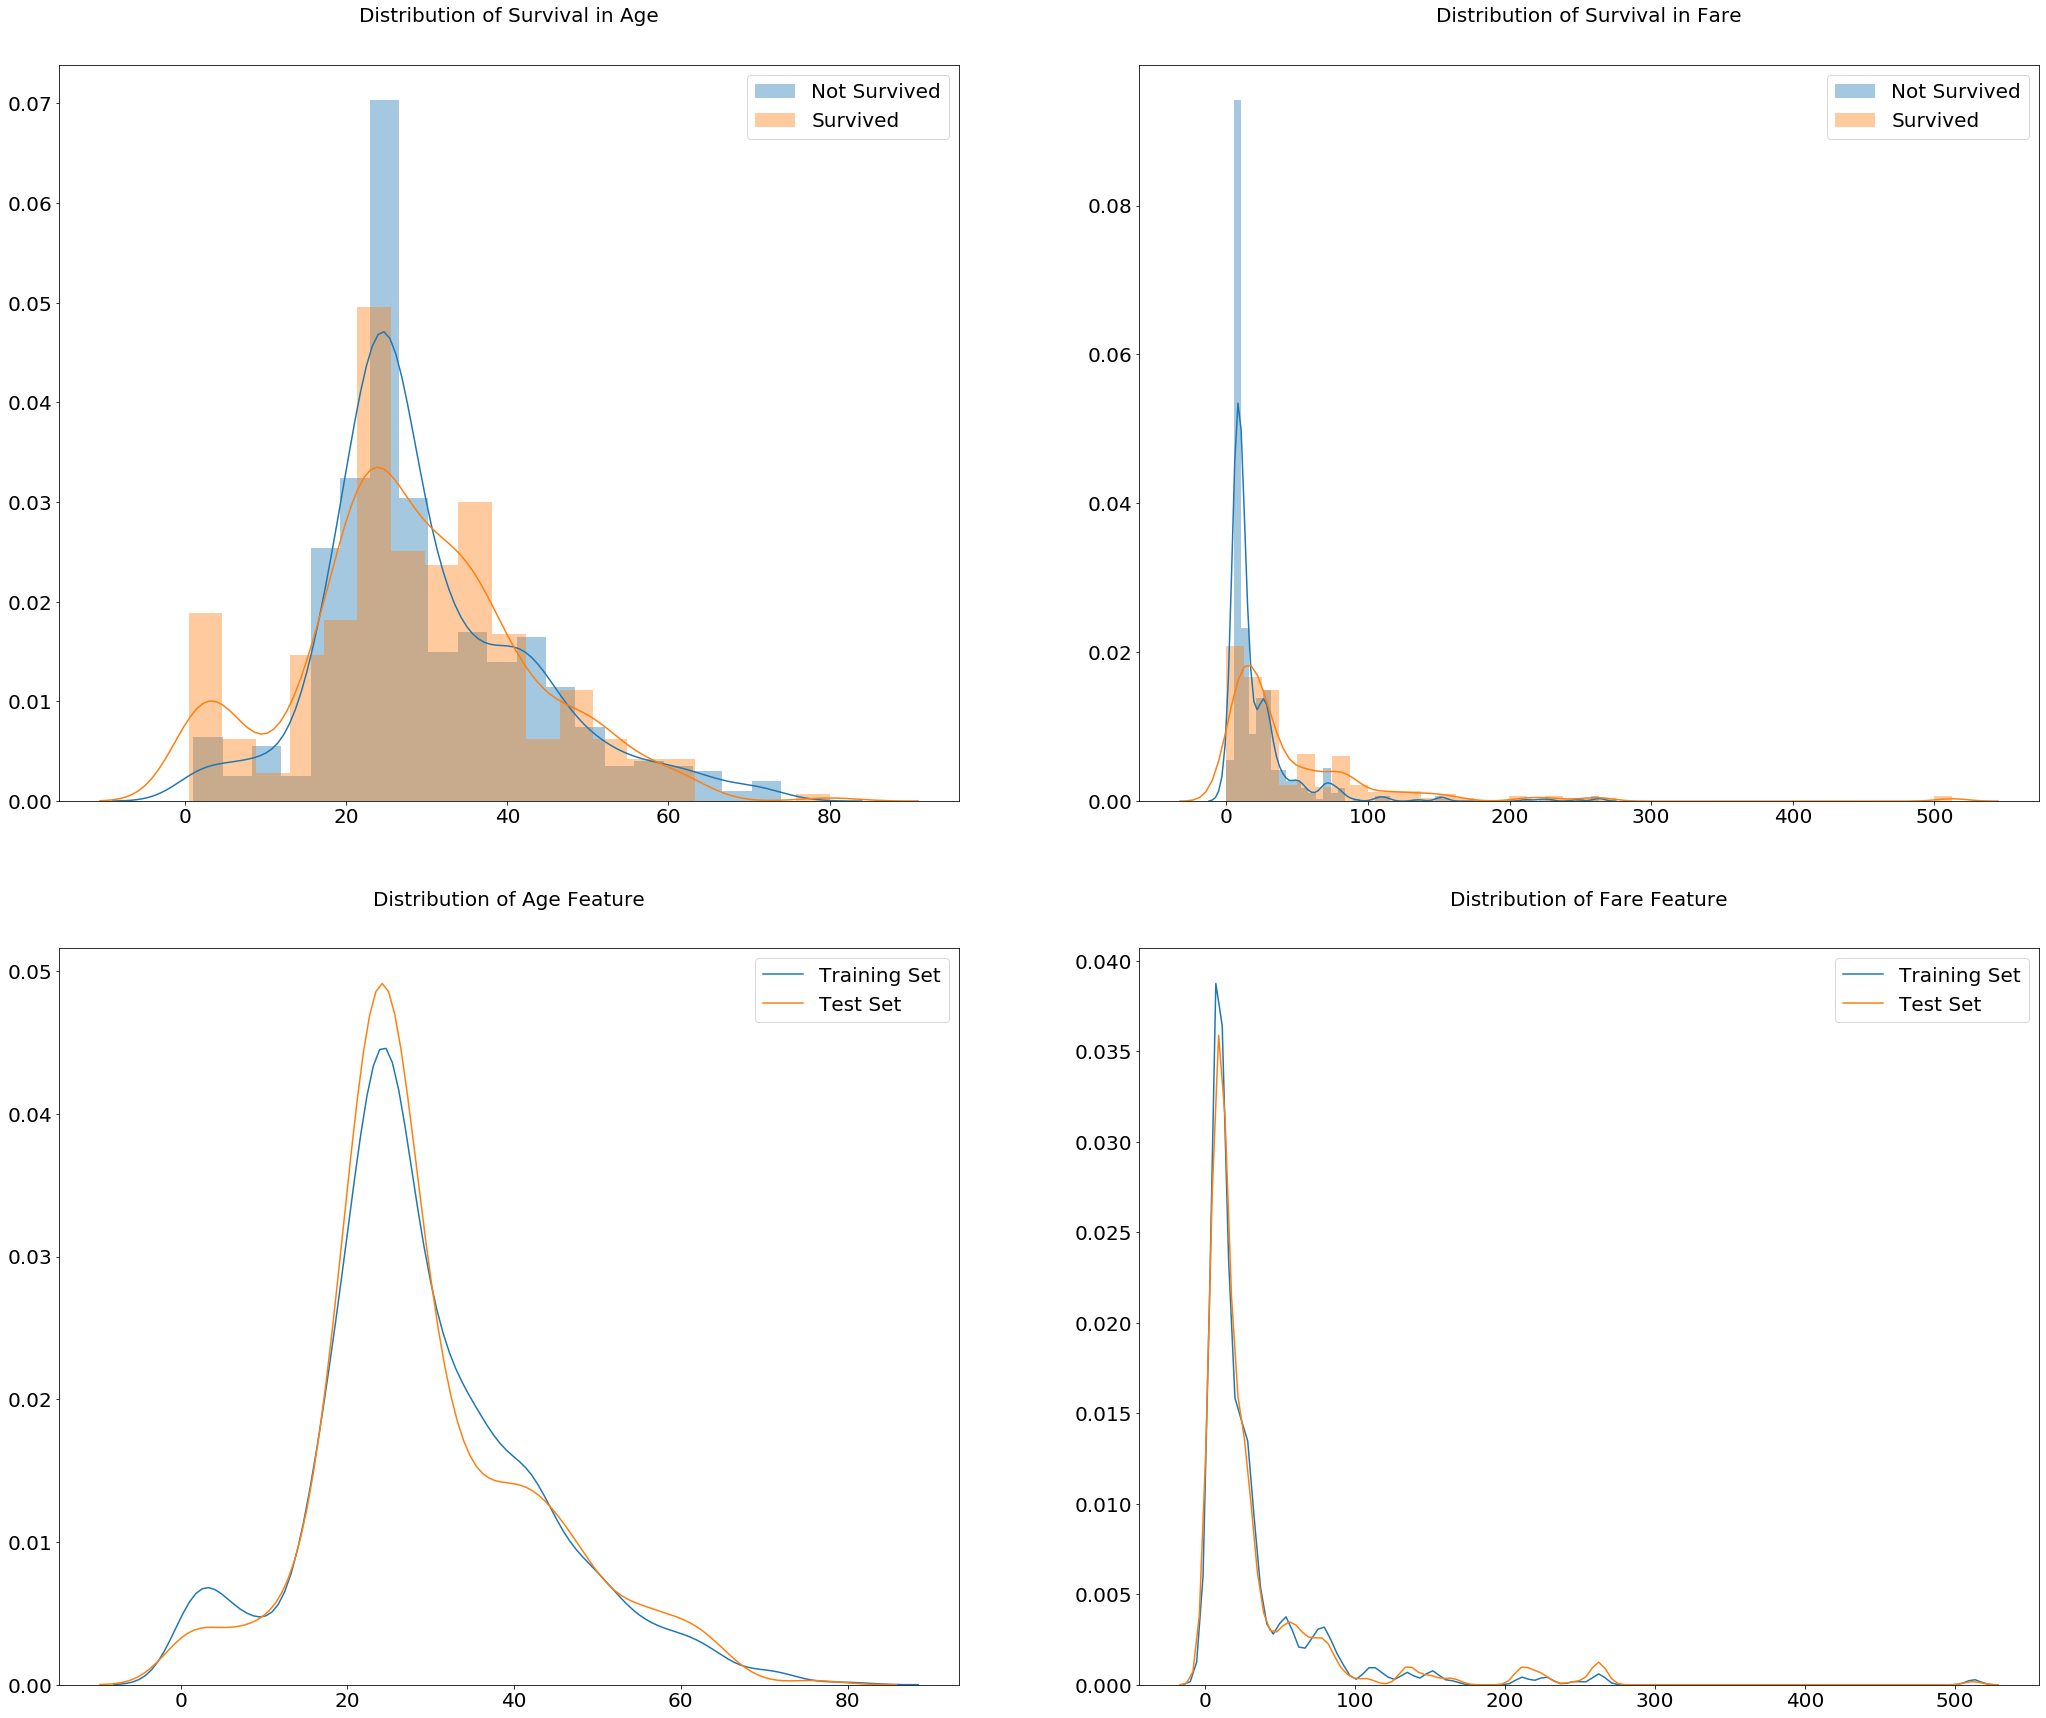

In [26]:
cont_features = ['Age', 'Fare']
surv = data_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(data_train[~surv][feature], label='Not Survived', hist=True, ax=axs[0][i])
    sns.distplot(data_train[surv][feature], label='Survived', hist=True, ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(data_train[feature], label='Training Set', hist=False, ax=axs[1][i])
    sns.distplot(data_test[feature], label='Test Set', hist=False, ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

In [27]:
data_all=pd.concat([data_train, data_test]).reset_index(drop=True)
data_all['Fare'] = pd.qcut(data_all['Fare'], 7)
data_all['Age'] = pd.qcut(data_all['Age'], 8)

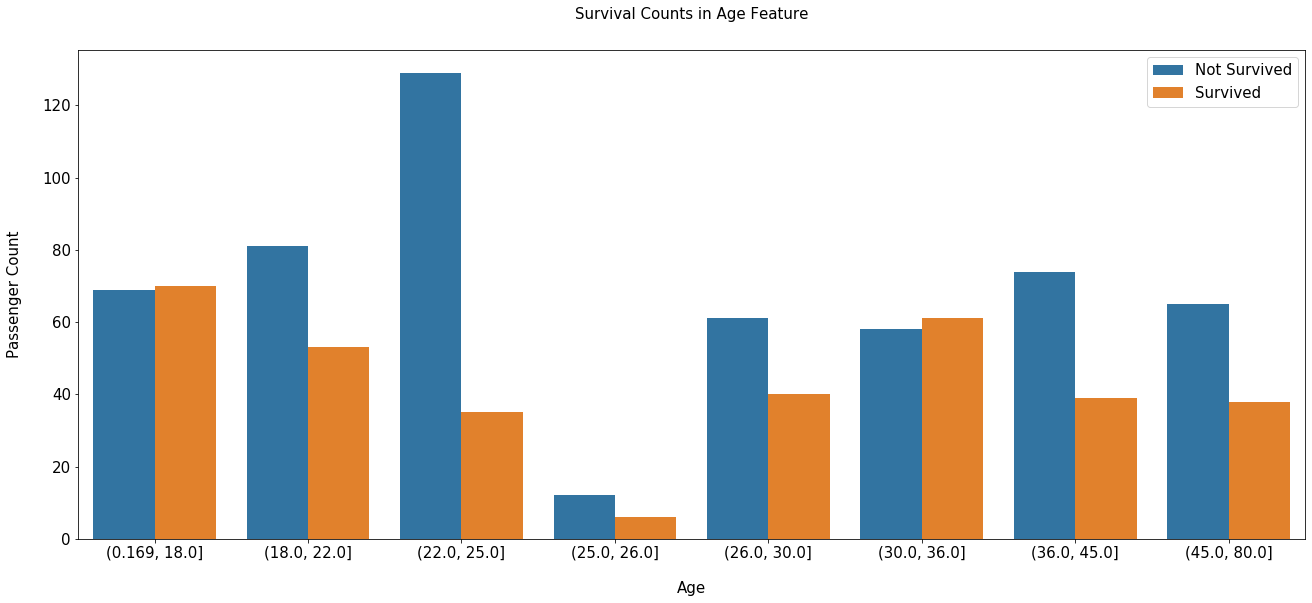

In [28]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=data_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

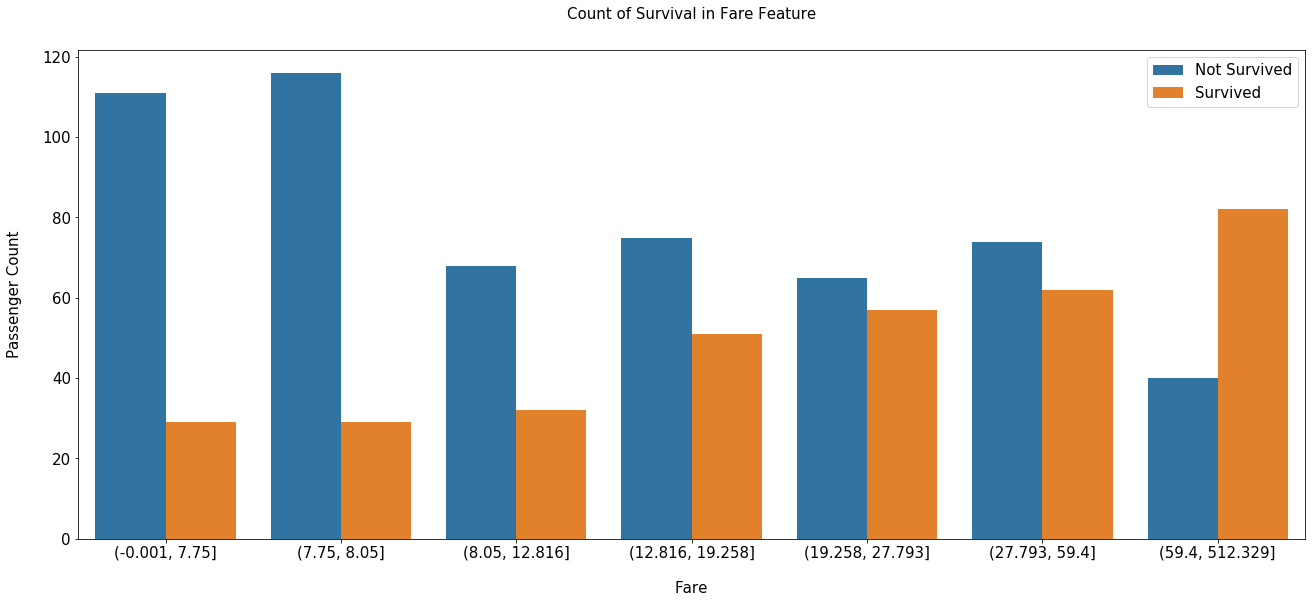

In [29]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [30]:
data_all=data_all.drop(columns=['Name','SibSp','Parch'])
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Sex          1309 non-null   object  
 4   Age          1309 non-null   category
 5   Fare         1309 non-null   category
 6   Cabin        1309 non-null   int64   
 7   Embarked     1309 non-null   object  
 8   Family_size  1309 non-null   object  
 9   Title        1309 non-null   object  
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 85.4+ KB


# 模型学习与预测

In [31]:
from sklearn.preprocessing import LabelEncoder
for feature in ['Embarked', 'Sex', 'Title', 'Family_size', 'Age', 'Fare']:
    data_all[feature] = LabelEncoder().fit_transform(data_all[feature])
data_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,Title
0,1,0.0,3,1,1,0,0,2,3,3
1,2,1.0,1,0,6,6,1,0,3,2
2,3,1.0,3,0,3,1,0,2,0,2
3,4,1.0,1,0,5,5,1,2,3,2
4,5,0.0,3,1,5,1,0,2,0,3


In [32]:
data_train,data_test = data_all.loc[:890], data_all.loc[891:].drop(columns='Survived')
X_train = data_train.drop(columns=['PassengerId','Survived'])
y_train = data_train['Survived'].values
X_test = data_test.drop(columns='PassengerId')

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[900,1000,1100,1200],'max_depth':np.arange(2,5)}
rnd_clf=RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rnd_clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 4, 'n_estimators': 1000}
0.8305368289637952


In [34]:
rnd_clf=RandomForestClassifier(n_estimators=1000,max_depth=3,random_state=42)
rnd_clf.fit(X_train, y_train)
predictions=rnd_clf.predict(X_test)
result=pd.DataFrame({'PassengerId': data_test.PassengerId.values, 'Survived': predictions.astype('int32')})
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
